## 1. 先把該匯入的函式庫一起匯入

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Adam
from keras.layers import concatenate, add, Input

Using TensorFlow backend.


## 2. 載入MNIST資料集

In [2]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)

There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28


In [3]:
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_train.min(), x_train.max()

(0.0, 1.0)

In [4]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

### NN架構圖
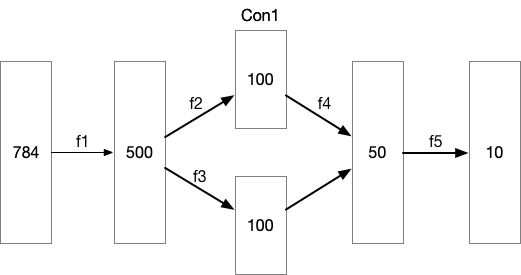

## 3. 定義輸入層

In [5]:
x = Input(shape=(784,))

## 4. 定義函數

In [6]:
f1 = Dense(500, activation='relu')
f2 = Dense(100, activation='sigmoid')
f3 = Dense(100, activation='sigmoid')
f4 = Dense(50, activation='relu')
f5 = Dense(10, activation='softmax')

## 5. 定義隱藏層，並且利用concatenate將h21, h22函數連接

In [8]:
h11 = f1(x)
h21 = f2(h11)
h22 = f3(h11)
con1=concatenate([h21,h22])
h31 = f4(con1)

## 6. 定義輸出層

In [9]:
y = f5(h31)

## 7. 確認一下NN疊構

In [10]:
model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          50100       dense_1[1][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          50100       dense_1[1][0]                    
__________________________________________________________________________________________________
concatenat

## 8. 開始預測吧！

In [11]:
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['acc'])
acc_history = model.fit(x_train, y_train, validation_split=0.2, batch_size=800, epochs=20, verbose=2)

score = model.evaluate(x_train, y_train)
print()  
print("\t Accuracy of testing data = {:2.1f}%".format(score[1]*100.0))  

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.7439 - acc: 0.7707 - val_loss: 0.1898 - val_acc: 0.9427
Epoch 2/20
 - 2s - loss: 0.1476 - acc: 0.9561 - val_loss: 0.1321 - val_acc: 0.9608
Epoch 3/20
 - 2s - loss: 0.0864 - acc: 0.9739 - val_loss: 0.1070 - val_acc: 0.9687
Epoch 4/20
 - 2s - loss: 0.0597 - acc: 0.9818 - val_loss: 0.1103 - val_acc: 0.9680
Epoch 5/20
 - 2s - loss: 0.0408 - acc: 0.9872 - val_loss: 0.0992 - val_acc: 0.9719
Epoch 6/20
 - 2s - loss: 0.0295 - acc: 0.9906 - val_loss: 0.1055 - val_acc: 0.9717
Epoch 7/20
 - 2s - loss: 0.0246 - acc: 0.9921 - val_loss: 0.0903 - val_acc: 0.9768
Epoch 8/20
 - 2s - loss: 0.0181 - acc: 0.9941 - val_loss: 0.1022 - val_acc: 0.9745
Epoch 9/20
 - 2s - loss: 0.0145 - acc: 0.9955 - val_loss: 0.1016 - val_acc: 0.9753
Epoch 10/20
 - 2s - loss: 0.0125 - acc: 0.9957 - val_loss: 0.1092 - val_acc: 0.974

### 真高的準確率...

## 9. 來個圖形表示準確度和Epoch的關係

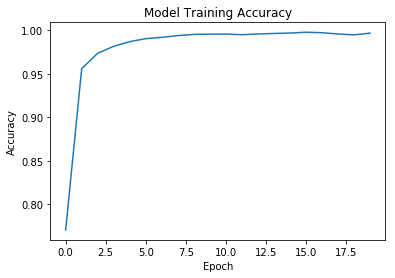

In [14]:
plt.plot(acc_history.history["acc"])

plt.title("Model Training Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()